In [4]:
# notebook for visualizing plane MILP results

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
x = 10e-9
s = (1 + x**2)**(1/2) - 1
print(s)
s1 = x**2 / ((1 + x**2)**(1/2) + 1)
print(s1)

0.0
5.0000000000000005e-17


In [5]:
import pytest


ModuleNotFoundError: No module named 'pytest'

In [2]:
!rm ./files/b-inv.txt
!python3 ./b-inv-part/main.py ./files/plane.lp >> ./files/b-inv.txt

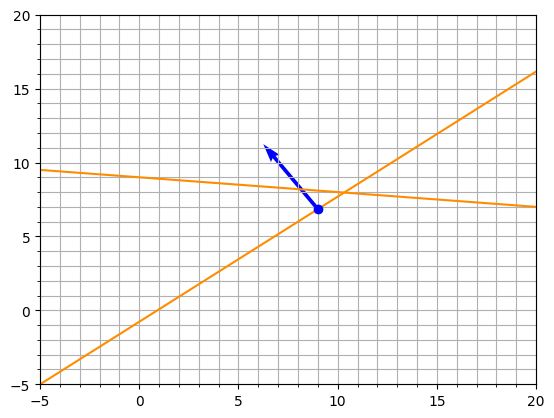

In [3]:
from pysmps import smps_loader as mps
from pyscipopt import LP


signs = mps.load_mps("./files/plane.mps")[5]
obj = mps.load_mps("./files/plane.mps")[6]
a_matrix = mps.load_mps("./files/plane.mps")[7]
rhs = mps.load_mps("./files/plane.mps")[9]['RHS']

constraints = zip(signs, a_matrix, rhs)

x = np.array([-10 + 0.1 * i for i in range(0, 1001)])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both', clip_on=False)
ax.set_ylim(-5, 20)
ax.set_xlim(-5, 20)

major_ticks = np.arange(-5, 21, 5)
minor_ticks = np.arange(-4, 21, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

for sign, row, rhs in constraints:
    if row[1] != 0:
        y = (rhs - row[0] * x) / row[1]
    else:
        y = np.array([-10 + 0.1 * i for i in range(0, 1001)])
        x = np.ones(len(y)) * rhs / row[0]
    ax.plot(x, y, 'darkorange')

lp = LP()
lp.readLP(b"./files/plane.mps")
lp.solve()
x_r, y_r = lp.getPrimal()

ax.plot(x_r, y_r, 'ob')

V = np.array(-obj)
origin = np.array([[x_r],[y_r]])

ax.quiver(*origin, V[0], V[1], color=['b'], scale=100, clip_on=False)

plt.show()

In [4]:
from pyscipopt import Model

milp = Model()
milp.readProblem("./files/plane.lp")
milp.optimize()

original problem has 2 variables (0 bin, 2 int, 0 impl, 0 cont) and 2 constraints
presolving:
presolving (1 rounds: 1 fast, 1 medium, 1 exhaustive):
 2 deleted vars, 2 deleted constraints, 0 added constraints, 14 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
transformed 1/1 original solutions to the transformed problem space
Presolving Time: 0.00

SCIP Status        : problem is solved [optimal solution found]
Solving Time (sec) : 0.00
Solving Nodes      : 0
Primal Bound       : +9.40000000000001e+00 (1 solutions)
Dual Bound         : +9.40000000000001e+00
Gap                : 0.00 %


In [5]:
milp_sol_x, milp_sol_y = np.array([milp.getVal(elem) for elem in milp.getVars()])

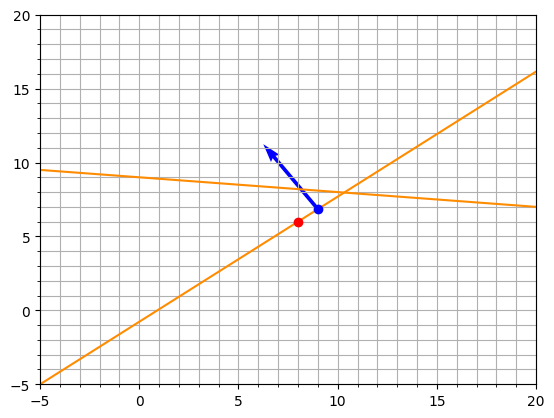

In [6]:
ax.plot(milp_sol_x, milp_sol_y, 'ro')
fig

In [7]:
milp.writeProblem("./files/plane_milp.mps")
mps.load_mps("./files/plane_milp.mps")

wrote problem to file /mnt/d/dev/Cutting-Plane-Generators/files/plane_milp.mps


('/mnt/d/dev/Cutting-Plane-Generators/files/plane.lp',
 'Obj',
 ['a1', 'a2'],
 ['x', 'y'],
 ['integral', 'integral'],
 ['E', 'L'],
 array([ 11. , -13.1]),
 array([[-11.,  13.],
        [  1.,  10.]]),
 ['RHS'],
 {'RHS': array([-10.,  90.])},
 ['Bound'],
 {'Bound': {'LO': array([1., 0.]), 'UP': array([ 9., inf])}})

In [8]:
lp.getBasisInds()

[1, -2]

In [10]:
lp.getSides()

([-10.0, -1e+100], [-10.0, 90.0])

In [15]:
np.concatenate((np.ones((2, 3)), np.eye(a_matrix.shape[0])), axis=1)

array([[1., 1., 1., 1., 0.],
       [1., 1., 1., 0., 1.]])

In [17]:
mps.load_mps("./files/plane.mps")[11]['BOUND']

{'LO': array([1., 0.]), 'UP': array([ 9., inf])}